 <!DOCTYPE html>
<html>
<head>
  <title>ESI CNN_Drop </title>
</head>
<body>

<h1>Retraining of the CNN on the dropout data</h1>
<p>Loading the sparsely sampled data and corresponding labels. Normalization of the data and reshaping them to be suitable for the CNN training. </p>
<p>Later we load the trained CNN model on the full data set and retrain the model with the sparsely sampled data. We retrain CNN with adam optimiser for 20 epochs and with adagrad for next 20 epochs. </p>

</body>
</html> 

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
import keras
gpus = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(gpus[0], True)

%matplotlib inline

Retraining of the CNN with noisy data 

In [2]:
import matplotlib.pylab as plt
import numpy as np
import pickle

from matplotlib import image
from matplotlib import pyplot
from matplotlib.pyplot import figure

In [3]:
T = np.load("training_data_Drop.npy")
T_x = np.reshape(T, [50, 80, 109, 1])


Labels = np.load('training_Label_Drop.npy', allow_pickle=True)
Labels_a = tf.reshape(Labels, [50,10])

print(T_x.shape)
print(Labels.shape)

(50, 80, 109, 1)
(50, 10)


In [4]:
print(Labels[4,:])

[0.85052572 0.32058857 0.74053516 0.90165227 0.69421226 0.46078153
 0.48397093 0.87050691 0.0686595  0.49003454]


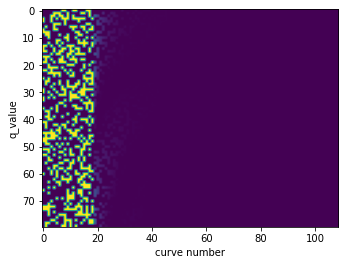

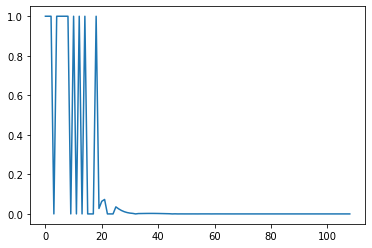

In [5]:
plt.imshow(T[3,:,:])
plt.ylabel('q_value')
plt.xlabel('curve number')
plt.show()
plt.plot(T[38,79,:])
plt.show()


In [6]:
from tensorflow import keras

from tensorflow.keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Dropout, Flatten, BatchNormalization
from keras import metrics
from keras.callbacks import ModelCheckpoint, Callback, ReduceLROnPlateau, CSVLogger
from keras import optimizers
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, Conv2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

In [7]:
def y_absolute_error(ind):
    def abs_err(y_true, y_pred):
        absolute_error = keras.backend.mean(abs(y_true[ind] - y_pred[ind]), axis=0)
        return absolute_error

    return abs_err

In [8]:
model=load_model('conv_models/20211021_exp_adagrad')

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 79, 108, 32)       160       
_________________________________________________________________
batch_normalization_12 (Batc (None, 79, 108, 32)       128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 78, 107, 32)       4128      
_________________________________________________________________
batch_normalization_13 (Batc (None, 78, 107, 32)       128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 77, 106, 32)       4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 53, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 38, 53, 32)       

In [9]:
opt = keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)


model.compile(optimizer= 'adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

model.fit(T_x, #X_training,
                    Labels, #thickness_training,
                    epochs=20,
                    batch_size=512,
                    verbose=1,
                    validation_split=0.2
                   )

score, acc = model.evaluate(T_x, Labels)

print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.0875 - mean_absolute_error: 0.2383 - val_loss: 0.0734 - val_mean_absolute_error: 0.2053
Epoch 2/20
1/1 [==============================] - 0s 110ms/step - loss: 0.0713 - mean_absolute_error: 0.2135 - val_loss: 0.0723 - val_mean_absolute_error: 0.2037
Epoch 3/20
1/1 [==============================] - 0s 103ms/step - loss: 0.0594 - mean_absolute_error: 0.1886 - val_loss: 0.0725 - val_mean_absolute_error: 0.2052
Epoch 4/20
1/1 [==============================] - 0s 103ms/step - loss: 0.0519 - mean_absolute_error: 0.1750 - val_loss: 0.0693 - val_mean_absolute_error: 0.2025
Epoch 5/20
1/1 [==============================] - 0s 103ms/step - loss: 0.0438 - mean_absolute_error: 0.1575 - val_loss: 0.0688 - val_mean_absolute_error: 0.2049
Epoch 6/20
1/1 [==============================] - 0s 102ms/step - loss: 0.0385 - mean_absolute_error: 0.1465 - val_loss: 0.0702 - val_mean_absolute_error: 0.2077
Epoch 7/20
1/1 [===============

In [10]:
opt = keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)
#opt = keras.optimizers.SGD

model.compile(optimizer= 'adagrad',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

model.fit(T_x, #X_training,
        Labels, #thickness_training,
        epochs=20,
        batch_size=512,
        verbose=1,
        validation_split=0.2
        #validation_data=(X_val, thickness_val),
        )

score, acc = model.evaluate(T_x, Labels)

print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.0078 - mean_absolute_error: 0.0512 - val_loss: 0.0832 - val_mean_absolute_error: 0.2342
Epoch 2/20
1/1 [==============================] - 0s 104ms/step - loss: 0.0078 - mean_absolute_error: 0.0511 - val_loss: 0.0832 - val_mean_absolute_error: 0.2342
Epoch 3/20
1/1 [==============================] - 0s 102ms/step - loss: 0.0078 - mean_absolute_error: 0.0511 - val_loss: 0.0832 - val_mean_absolute_error: 0.2341
Epoch 4/20
1/1 [==============================] - 0s 102ms/step - loss: 0.0078 - mean_absolute_error: 0.0511 - val_loss: 0.0830 - val_mean_absolute_error: 0.2341
Epoch 5/20
1/1 [==============================] - 0s 103ms/step - loss: 0.0078 - mean_absolute_error: 0.0511 - val_loss: 0.0828 - val_mean_absolute_error: 0.2341
Epoch 6/20
1/1 [==============================] - 0s 102ms/step - loss: 0.0078 - mean_absolute_error: 0.0511 - val_loss: 0.0824 - val_mean_absolute_error: 0.2340
Epoch 7/20
1/1 [===============

In [11]:
#model.save('convolutionalmodels/20220303_Noise_adagrad10')